In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science','no-latex'])
import uproot3 as uproot
import seaborn as sns
from matplotlib.gridspec import GridSpec
from brokenaxes import brokenaxes

### opening the tree

# PG Matrix

In [27]:
input_file = uproot.open('./root_outputs/SumRun_59-93.root')
singles_tree = input_file['t1']
singles_tree.arrays(['Range','Etot','EndCap','Upstream'])
df_singles = singles_tree.pandas.df(['Range*','Etot*','EndCap*','Upstream*'])

In [28]:
df_singles_barrel = df_singles.loc[(df_singles['EndCap'] == 0) & (df_singles['Upstream'] == 0)]

Text(0, 0.5, 'Range (MeV)')

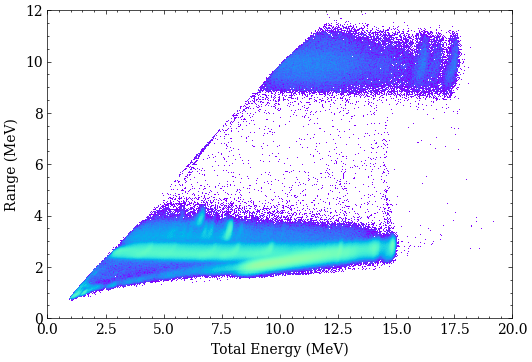

In [32]:
fig, ax = plt.subplots(figsize=(6,4))
ax.hist2d(0.001*df_singles_barrel['Etot'],0.001*df_singles_barrel['Range'], 
          bins=[1000,600], range=[[0,20], [0,12]], norm=mpl.colors.LogNorm(), cmap='rainbow', cmin=1)
ax.set_xlabel('Total Energy (MeV)')
ax.set_ylabel('Range (MeV)')

In [1]:
fig=plt.figure(figsize=(8,8), dpi=200)
gs = GridSpec(4,3)
ax1 = plt.subplot(gs[0:2, 0:2])
ax2 = plt.subplot(gs[0:2,2:3])
ax3 = plt.subplot(gs[2:4,0:2])
ax4 = plt.subplot(gs[2:4, 2:3])

# main plot ----------------------------------------------------------------
ax1.hist2d(df_pg_barrel['ExcitationEnergy'],df_pg_barrel['GammaEnergy']
        ,bins=[1800,1000], norm=mpl.colors.LogNorm(), cmap='rainbow', cmin=1)
# lines
ax1.axvline(x = 9154, color = 'k',linestyle='-',label='S(n)= 9154')
ax1.axvline(x = 9297, color = 'r',linestyle='-',label='S(p)= 9297')

# sub plot ----------------------------------------------------------------
ax2.hist(df_pg_barrel['GammaEnergy'],bins=1000, 
         histtype='step', fill=False, edgecolor='royalblue', orientation='horizontal')
# texts
ax2.text(1500,2207+80, r'2207',fontsize=7)
ax2.text(1200,2999-20, r'2999',fontsize=7)
ax2.text(500,4421-20, r'4421 ?',fontsize=7)
ax2.text(400,6124-20, r'6124 ?',fontsize=7)

# main plot ----------------------------------------------------------------
ax3.hist2d(df_pg_barrel['ExcitationEnergy'],df_pg_barrel['GammaEnergy']
        ,bins=[1800,15000], norm=mpl.colors.LogNorm(), cmap='rainbow', cmin=1)
# lines
ax3.axvline(x = 9154, color = 'k',linestyle='-',label='S(n)= 9154')
ax3.axvline(x = 9297, color = 'r',linestyle='-',label='S(p)= 9297')

# sub plot ----------------------------------------------------------------
ax4.hist(df_pg_barrel['GammaEnergy'],bins=15000, 
         histtype='step', fill=False, edgecolor='royalblue', orientation='horizontal')
# texts
ax4.text(2000,204+10, r'204 $^{95}$Mo',fontsize=7,color='orangered')
ax4.text(1500,385, r'385',fontsize=7)
ax4.text(2000,511, r'511',fontsize=7)
ax4.text(1500,593-20, r'593',fontsize=7)
ax4.text(1500,615, r'615',fontsize=7)
ax4.text(2400,765-30, r'765 $^{95}$Mo',fontsize=7,color='orangered')
ax4.text(3500,778-5, r'778 $^{96}$Mo',fontsize=7,color='royalblue')
ax4.text(2100,849-10, r'849',fontsize=7)
ax4.text(2700,947-15, r'947 $^{95}$Mo',fontsize=7,color='orangered')
ax4.text(1000,1013-10, r'1013',fontsize=7)
ax4.text(1200,1073-10, r'1073 $^{95}$Mo',fontsize=7,color='orangered')

# utilities----------------------------------------------------------------
fig.text(0.04,0.5,r'$\gamma$-ray Energy (keV)',va='center', rotation='vertical')
# main plot
ax1.set_ylim(1200,7000)
ax1.xaxis.tick_top()
ax1.legend()
# sub plot
ax2.set_ylim(1200,7000)
ax2.set_xlim(0,2500)
ax2.yaxis.tick_right()
ax2.xaxis.tick_top()
# main plot
ax3.set_xlabel('Excitation Energy (keV)')
ax3.set_ylim(0,1200)
# subplot
ax4.set_xlabel('Counts')
ax4.set_ylim(0,1200)
ax4.set_xlim(0,6500)
ax4.yaxis.tick_right()

# Hide spines
ax1.spines['bottom'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax3.xaxis.tick_bottom()
ax4.xaxis.tick_bottom()

# diagonal lines
d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax1.transAxes, color='dimgray', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax2.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax3.transAxes)  # switch to the bottom axes
ax3.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax3.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

kwargs.update(transform=ax4.transAxes)  # switch to the bottom axes
ax4.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax4.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal


NameError: name 'plt' is not defined

## 1D-Gamma below and above Sp

In [ ]:
Sp = 9297
df_pg_barrel_one = df_pg_barrel.loc[(df_pg_barrel['ExcitationEnergy_PG'] <= Sp)]
df_pg_barrel_two = df_pg_barrel.loc[(df_pg_barrel['ExcitationEnergy_PG'] > Sp)]

# plot
plt.figure(figsize=(6,3), dpi=200)
plt.hist(df_pg_barrel_two['GammaEnergy']
        ,bins=18000, density=True, histtype='step', fill=False, edgecolor='orangered',label=r'E$_x$ > S$_p$')
plt.hist(df_pg_barrel_one['GammaEnergy']
        ,bins=18000, density=True, histtype='step', fill=False, edgecolor='royalblue',label='E$_x$ < S$_p$')
plt.text(204-15,0.008,r'204 $^{95}$Mo',fontsize=7,color='orangered',rotation=90)
plt.text(765-20,0.003,r'765 $^{95}$Mo',fontsize=7,color='orangered',rotation=90)
plt.text(947-15,0.004,r'947 $^{95}$Mo',fontsize=7,color='orangered',rotation=90)
plt.text(1073-15,0.002,r'1073 $^{95}$Mo',fontsize=7,color='orangered',rotation=90)

plt.xlabel(r'$\gamma$-ray energy')
plt.xlim(0,1250)
plt.legend(fontsize=9)

In [ ]:
# plot with breaks on x-axis
fig = plt.figure(figsize=(6,3), dpi=200)
bax = brokenaxes(xlims=((0,100),(220,300),(520,750),(783,840),(857,940),(955,1250)), hspace=0.001)
bax.hist(df_pg_barrel_two['GammaEnergy']
        ,bins=18000, density=True, histtype='step', fill=False, edgecolor='orangered',label=r'E$_x$ > S$_p$')
bax.hist(df_pg_barrel_one['GammaEnergy']
        ,bins=18000, density=True, histtype='step', fill=False, edgecolor='royalblue',label='E$_x$ < S$_p$')

bax.text(72-5,0.0015,r'72',fontsize=7,color='black',rotation=90)
bax.text(261-10,0.0015,r'261',fontsize=7,color='black',rotation=90)
bax.text(593-12,0.0016,r'593',fontsize=7,color='black',rotation=90)
bax.text(615-7,0.0016,r'615',fontsize=7,color='black',rotation=90)
bax.text(673-15,0.0010,r'673',fontsize=7,color='black',rotation=90)
bax.text(691-15,0.0011,r'691',fontsize=7,color='black',rotation=90)
bax.text(702-5,0.0010,r'702',fontsize=7,color='black',rotation=90)
bax.text(728-4,0.0009,r'728',fontsize=7,color='black',rotation=90)
bax.text(785-1,0.0009,r'785',fontsize=7,color='black',rotation=90)
bax.text(820-5,0.0009,r'820',fontsize=7,color='black',rotation=90)
bax.text(834,0.0009,r'834',fontsize=7,color='black',rotation=90)
bax.text(870-4,0.0007,r'870',fontsize=7,color='black',rotation=90)
bax.text(933-5,0.0007,r'933',fontsize=7,color='black',rotation=90)
bax.text(989-5,0.0006,r'989',fontsize=7,color='black',rotation=90)
bax.text(1055-10,0.0007,r'1055',fontsize=7,color='black',rotation=90)
bax.text(1073-10,0.0013,r'1073',fontsize=7,color='orangered',rotation=90)
bax.text(1110-10,0.0007,r'1110',fontsize=7,color='k',rotation=90)

bax.set_xlabel(r'$\gamma$-ray energy')
bax.set_ylim(0,0.003)
bax.legend(fontsize=9,fancybox=True)